In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [7]:
# data
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1
    return (X, Y.reshape(-1,1))

In [8]:
x, y = load_coffee_data();
print(x.shape, y.shape)

(200, 2) (200, 1)


In [10]:
# Normalize data
print(f"Temperature Max, Min pre normalization: {np.max(x[:,0]):0.2f}, {np.min(x[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(x[:,1]):0.2f}, {np.min(x[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(x)  # learns mean, variance
Xn = norm_l(x)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51

Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


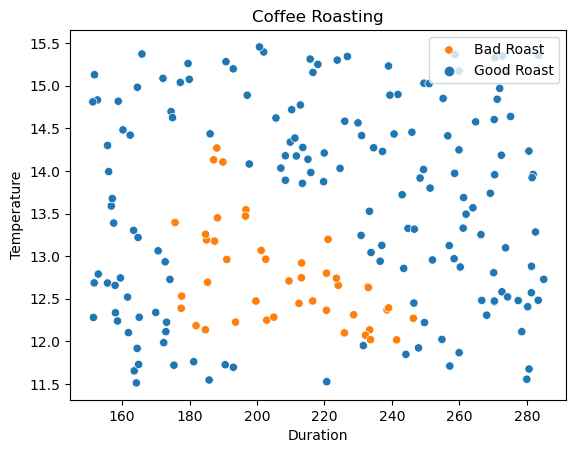

In [21]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y[:,0], marker="o", color='red')
plt.xlabel("Duration")
plt.ylabel("Temperature")
plt.title("Coffee Roasting")
labels=["Bad Roast", "Good Roast"]
plt.legend(loc=1, labels=labels)
plt.show()

In [22]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [23]:
g = sigmoid

In [32]:
def dense(a_in, W, b):
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:,j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = g(z)
    return(a_out)

In [26]:
def sequential(x,W1,b1,W2,b2):
    a1 = dense(x,W1, b1)
    a2 = dense(a1, W2, b2)
    return(a2)

In [27]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [28]:
def predict(x,W1,b1,W2,b2):
    m = x.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i,0] = sequential(x[i],W1,b1,W2,b2)
    return(p)

In [33]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

In [34]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


In [38]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load the image
image = Image.open('1_test.jpg')

# Define a transformation to convert the image to grayscale and then binary
transform = transforms.Compose([
    transforms.Grayscale(),  # Convert to grayscale
    transforms.ToTensor(),   # Convert to tensor
    lambda x: torch.where(x > 0.5, torch.tensor(1.0), torch.tensor(0.0))  # Convert to binary
])

# Apply the transformation to the image
binary_image = transform(image)

# Save the binary image
transforms.ToPILImage()(binary_image).save('binary_image.jpg')